Requete pour récupérer les questions sur StackOverflow sur : https://data.stackexchange.com/stackoverflow/query

```sql
SELECT TOP 50000 Title, Tags, Body
FROM Posts
WHERE ViewCount > 1000
AND Score > 10
AND AnswerCount > 2
AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5;
```

Exploration des données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, nltk, dill
import numpy as np

from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
data = pd.read_csv('QueryResults.csv')
data.shape

(50000, 3)

In [4]:
data.tail()

Title  \
49995  OracleConnection.Open is throwing ORA-12541 TN...   
49996  How to run Headless Chrome in Azure Cloud Serv...   
49997  Rails Google Client API - unable to exchange a...   
49998             is @Singleton in dagger 2 thread safe?   
49999  RESTful web service creation tutorial with Jav...   

                                                    Tags  \
49995  <c#><oracle><oracle11g><database-connection><c...   
49996  <google-chrome><azure><azure-functions><azure-...   
49997  <ruby-on-rails><oauth-2.0><omniauth><access-to...   
49998  <java><android><multithreading><thread-safety>...   
49999    <java><eclipse><rest><tomcat><web-applications>   

                                                    Body  
49995  <p>So I am connecting to an external server th...  
49996  <p>I am trying to use Headless Chrome to gener...  
49997  <p>After struggling with some <a href="https:/...  
49998  <p>I'm trying to move everything in my app awa...  
49999  <p>I'd like to create and run a simple RESTful...

In [5]:
data.sample(15)

Title  \
7766   code sign wants to sign using key - Doesn't al...   
7825                   macbook adb cannot open interface   
37664            bower install self_signed_cert_in_chain   
47065    Using custom font in android TextView using xml   
32339  Ajax with history.pushState and popstate - wha...   
40895  Can JavaScript constructor return function and...   
10089          Individual progress in jQuery file upload   
33176  Failed to execute 'play' on 'HTMLMediaElement'...   
263    How can I tell if a DOM element is visible in ...   
11754              Multicore programming: the hard parts   
42000  Entity to json error - A circular reference wa...   
44856                  Where to store API keys on Swift?   
25863  How to scrape only visible webpage text with B...   
13779                     SQL index for date range query   
41146              R: Plotting a 3D surface from x, y, z   

                                                    Tags  \
7766   <ios><objective-c><iphone><code-signing><xcode...   
7825                  <android><macos><usb><adb><nexus6>   
37664  <security><ssl><installation><ssl-certificate>...   
47065        <java><android><xml><android-layout><fonts>   
32339  <javascript><jquery><html><browser-history><ht...   
40895  <javascript><oop><function><constructor><proto...   
10089  <javascript><jquery><html><file-upload><jquery...   
33176  <javascript><android><angularjs><google-chrome...   
263            <javascript><html><firefox><dom><browser>   
11754     <c#><.net><f#><multicore><parallel-processing>   
42000  <c#><.net><json><entity-framework><asp.net-mvc-4>   
44856     <ios><swift><swift2><stripe-payments><api-key>   
25863  <python><web-scraping><text><beautifulsoup><ht...   
13779  <sql><database><indexing><sql-server-2014><dat...   
41146                         <r><3d><matrix><plot><rgl>   

                                                    Body  
7766   <p>I'm trying to build and archive the applica...  
7825   <p>I am encountering a problem with Android AD...  
37664  <p>I am building a angular app in windows, usi...  
47065  <p>I have added a custom font file to my asset...  
32339  <p>I'm trying out the HTML5 history API with a...  
40895  <pre><code>function F() {\n    return function...  
10089  <p>I've been recommended to use jQuery file up...  
33176  <p>I'm making a music playing page, where I us...  
263    <p>Is there an efficient way to tell if a DOM ...  
11754  <p>I'm writing a book on multicore programming...  
42000  <p>Following error occurred when trying to con...  
44856  <p>I have a bunch of API keys and secrets (Str...  
25863  <p>Basically, I want to use <code>BeautifulSou...  
13779  <p>For a few days, I've been struggling with i...  
41146  <p>imagine I have a 3 columns matrix<br>\nx, y...

Suppression des Balises du code dans les questions

In [6]:
def clear_html_code_tag():
    import re
    regex = r"<code>((.|\n)*)<\/code>"
    data['Body']= data['Body'].parallel_apply(lambda x: re.sub(regex, '', x, 0, re.MULTILINE))
clear_html_code_tag()

Suppression des balises HTML dans les questions

In [7]:
def clear_html_tags():
    from bs4 import BeautifulSoup
    data['Body'] = data['Body'].parallel_apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
clear_html_tags() 

In [8]:
data.head()

Title  \
0  Getting parent of a vertex in a perfect binary...   
1  How can I make the cursor turn to the wait cur...   
2  HTML Tables - How to make IE not break lines a...   
3  How to play audio file on windows from command...   
4  EditText in Listview loses focus when pressed ...   

                                                Tags  \
0  <algorithm><data-structures><tree><binary-tree...   
1  <c#><.net><winforms><user-interface><mouse-cur...   
2  <html><css><html-table><internet-explorer-7><l...   
3    <windows><command-line><audio><batch-file><mp3>   
4  <android><android-listview><android-edittext><...   

                                                Body  
0  I've got a perfect binary tree that's enumerat...  
1  How can I display the Wait/Busy Cursor (usuall...  
2  I have some table cells containing dates forma...  
3  In Windows, is there a simple way (i.e. someth...  
4  I know there are a lot of similar questions ou...

In [9]:
data['Body'] = data['Body'].str.lower()
data['Title'] = data['Title'].str.lower()
data['corpus'] = data['Title']+data['Body']
data.head()

Title  \
0  getting parent of a vertex in a perfect binary...   
1  how can i make the cursor turn to the wait cur...   
2  html tables - how to make ie not break lines a...   
3  how to play audio file on windows from command...   
4  edittext in listview loses focus when pressed ...   

                                                Tags  \
0  <algorithm><data-structures><tree><binary-tree...   
1  <c#><.net><winforms><user-interface><mouse-cur...   
2  <html><css><html-table><internet-explorer-7><l...   
3    <windows><command-line><audio><batch-file><mp3>   
4  <android><android-listview><android-edittext><...   

                                                Body  \
0  i've got a perfect binary tree that's enumerat...   
1  how can i display the wait/busy cursor (usuall...   
2  i have some table cells containing dates forma...   
3  in windows, is there a simple way (i.e. someth...   
4  i know there are a lot of similar questions ou...   

                                              corpus  
0  getting parent of a vertex in a perfect binary...  
1  how can i make the cursor turn to the wait cur...  
2  html tables - how to make ie not break lines a...  
3  how to play audio file on windows from command...  
4  edittext in listview loses focus when pressed ...

Tokenization

In [10]:
def tokenization(df):
    import nltk
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    df['title_tokens'] = df['Title'].parallel_apply(lambda x: tokenizer.tokenize(x))
    df['corpus_tokens'] = df['corpus'].parallel_apply(lambda x: tokenizer.tokenize(x))
tokenization(df=data)

data = data.drop(labels=['Body', 'Title', 'corpus'], axis='columns')
data.head()

Tags  \
0  <algorithm><data-structures><tree><binary-tree...   
1  <c#><.net><winforms><user-interface><mouse-cur...   
2  <html><css><html-table><internet-explorer-7><l...   
3    <windows><command-line><audio><batch-file><mp3>   
4  <android><android-listview><android-edittext><...   

                                        title_tokens  \
0  [getting, parent, of, a, vertex, in, a, perfec...   
1  [how, can, i, make, the, cursor, turn, to, the...   
2  [html, tables, how, to, make, ie, not, break, ...   
3  [how, to, play, audio, file, on, windows, from...   
4  [edittext, in, listview, loses, focus, when, p...   

                                       corpus_tokens  
0  [getting, parent, of, a, vertex, in, a, perfec...  
1  [how, can, i, make, the, cursor, turn, to, the...  
2  [html, tables, how, to, make, ie, not, break, ...  
3  [how, to, play, audio, file, on, windows, from...  
4  [edittext, in, listview, loses, focus, when, p...

### Analyse de la frequence des Tokens

In [11]:
corpus_temp = data['corpus_tokens'].to_list()
corpus = [item for sublist in corpus_temp for item in sublist]

freq = pd.DataFrame(nltk.FreqDist(corpus), index=[0]).T
print(len(freq))
freq

79283


0
getting       3266
parent         756
of           62679
a           117363
vertex          49
...            ...
dbaspot          1
444787           1
tokenafter       1
rubyfy           1
jsr311           1

[79283 rows x 1 columns]

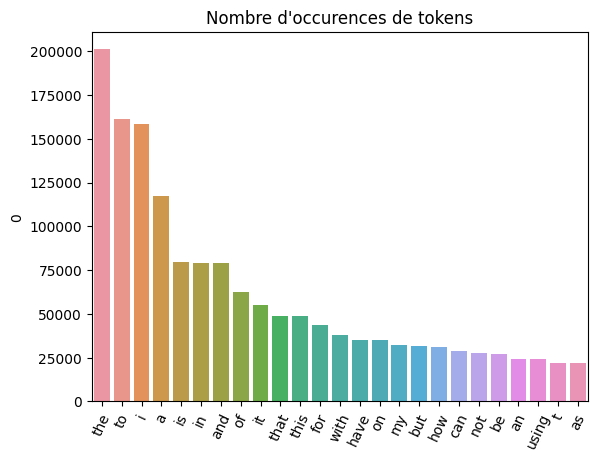

In [12]:
freq = freq.sort_values(by=0, ascending=False)
sns.barplot(x=freq.iloc[:25, 0].index, y=freq.iloc[:25, 0])
plt.xticks(rotation=65)
plt.title("Nombre d'occurences de tokens")
plt.show()

La ponctuation est déjà retirée :suppression des Stop words

In [13]:
data['corpus_tokens']

0        [getting, parent, of, a, vertex, in, a, perfec...
1        [how, can, i, make, the, cursor, turn, to, the...
2        [html, tables, how, to, make, ie, not, break, ...
3        [how, to, play, audio, file, on, windows, from...
4        [edittext, in, listview, loses, focus, when, p...
                               ...                        
49995    [oracleconnection, open, is, throwing, ora, 12...
49996    [how, to, run, headless, chrome, in, azure, cl...
49997    [rails, google, client, api, unable, to, excha...
49998    [is, singleton, in, dagger, 2, thread, safe, i...
49999    [restful, web, service, creation, tutorial, wi...
Name: corpus_tokens, Length: 50000, dtype: object

In [14]:
def remove_stop_words():
    # tentative avec fichier a part
    stop_words_df = pd.read_csv("stopwords-en.csv", sep=',', )
    stop_words = stop_words_df.columns.to_list()
    # from nltk.corpus import stopwords
    # nltk.download('stopwords', quiet=True)
    # stop_words = stopwords.words('english')
    data['corpus_tokens'] = data['corpus_tokens'].parallel_apply(lambda x: [token for token in x if not token in stop_words])
    data['title_tokens'] = data['title_tokens'].parallel_apply(lambda x: [token for token in x if not token in stop_words])

remove_stop_words()

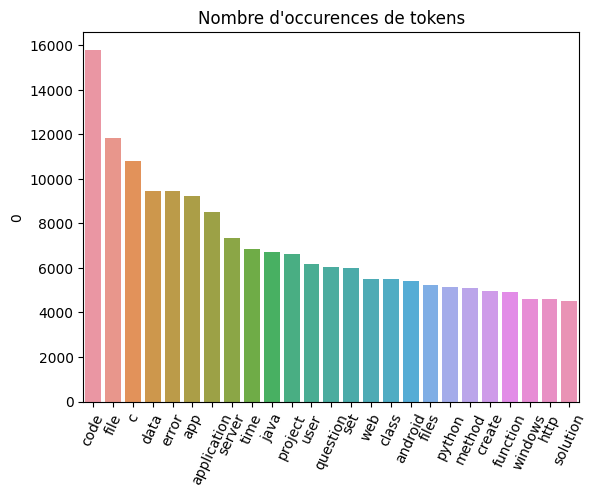

In [15]:
corpus_temp = data['corpus_tokens'].to_list()
corpus = [item for sublist in corpus_temp for item in sublist]
freq = pd.DataFrame(nltk.FreqDist(corpus), index=[0]).T
freq = freq.sort_values(by=0, ascending=False)
sns.barplot(x=freq.iloc[:25, 0].index, y=freq.iloc[:25, 0])
plt.xticks(rotation=65)
plt.title("Nombre d'occurences de tokens")
plt.show()

Recherche des mots peu utilisés (1 seule occurence)

In [16]:
from random import sample

corpus = [item for sublist in data['corpus_tokens'].to_list() for item in sublist]

unusual_words = pd.DataFrame(nltk.FreqDist(corpus), index=[0]).T
unusual_words = unusual_words.loc[unusual_words[0] <= 1]
unusual_words = unusual_words.index.to_list()
print('Exemple de mots inusité :', sample(unusual_words, 5))
print('Nombre total de unused words : ', len(unusual_words))

Exemple de mots inusité : ['975', 'templavoila', 'gabrielmaldi', 'developlemt', 'preparestreamsandstart']
Nombre total de unused words :  43578


Suppression des mots peu utilisés
**Traitement long** ( ~ 1.5 min)

In [17]:
def remove_unused_words(df, column_name, unused):
    df[column_name] = df[column_name].parallel_apply(lambda x: [word for word in x if not word in unused])

remove_unused_words(df=data, column_name='corpus_tokens', unused=unusual_words)
remove_unused_words(df=data, column_name='title_tokens', unused=unusual_words)

## Lemmatisation

In [18]:
def lemmatizer():
    from nltk.stem import WordNetLemmatizer
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()

    print('avant Stemming : ', data.loc[15, 'corpus_tokens'])
    data['title_tokens'] = data['title_tokens'].parallel_apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
    data['corpus_tokens'] = data['corpus_tokens'].parallel_apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
    print('après Stemming : ', data.loc[15, 'corpus_tokens'])

lemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vkubi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


avant Stemming :  ['set', 'pandas', 'dataframes', 'redis', 'pyarrow', 'pyarrow', 'objects', 'redis', 'reference', 'set', 'pandas', 'dataframe', 'redis']
après Stemming :  ['set', 'panda', 'dataframes', 'redis', 'pyarrow', 'pyarrow', 'object', 'redis', 'reference', 'set', 'panda', 'dataframe', 'redis']


## Bag of Words

In [19]:
data['title_tokens']

0                  [parent, vertex, perfect, binary, tree]
1                                   [cursor, wait, cursor]
2                       [html, table, break, line, hyphen]
3                     [play, audio, file, window, command]
4        [edittext, listview, loses, focus, pressed, an...
                               ...                        
49995    [oracleconnection, throwing, os, 12541, tn, li...
49996    [headless, chrome, azure, cloud, service, azur...
49997    [rail, google, client, api, unable, exchange, ...
49998                    [singleton, dagger, thread, safe]
49999    [restful, web, service, creation, tutorial, ja...
Name: title_tokens, Length: 50000, dtype: object

### Transformation Target

In [20]:
data['Tags'] = data['Tags'].str.replace('><',',')
data['Tags'] = data['Tags'].str.replace('>','')
data['Tags'] = data['Tags'].str.replace('<','')
data['Tags'] = data['Tags'].str.split(',')
data['Tags']

0        [algorithm, data-structures, tree, binary-tree...
1        [c#, .net, winforms, user-interface, mouse-cur...
2        [html, css, html-table, internet-explorer-7, l...
3          [windows, command-line, audio, batch-file, mp3]
4        [android, android-listview, android-edittext, ...
                               ...                        
49995    [c#, oracle, oracle11g, database-connection, c...
49996    [google-chrome, azure, azure-functions, azure-...
49997    [ruby-on-rails, oauth-2.0, omniauth, access-to...
49998    [java, android, multithreading, thread-safety,...
49999      [java, eclipse, rest, tomcat, web-applications]
Name: Tags, Length: 50000, dtype: object

In [21]:
data.columns

Index(['Tags', 'title_tokens', 'corpus_tokens'], dtype='object')

Filtre les lignes contenant du vide

In [22]:
print("Avant suppression des lignes vides :", data.shape[0])
data = data.loc[(data['title_tokens'].astype(bool)) & (data['corpus_tokens'].astype(bool)) & ((data['Tags'].astype(bool)))]
print("Après suppression des lignes vides :", data.shape[0])

Avant suppression des lignes vides : 50000
Après suppression des lignes vides : 49961


In [23]:
data.to_csv('data.csv', sep=';', index=False)

# Enregistrement des stop words pour la pipeline
stop_words_df = pd.read_csv("stopwords-en.csv", sep=',', )
stop_words = stop_words_df.columns.to_list()
with open("D:\\PycharmProjects\\steamlit-p5-oc\\ressources\\stop_words.pkl", "wb") as f:
    dill.dump(stop_words, f)